# Naive Bayes 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import statistics as stat

In [5]:
file = 'iris.csv'
data = pd.read_csv(file)
data.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
data2 = data

In [7]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.837584,3.057718,3.750336,1.193960
std,0.827849,0.432651,1.767409,0.763547
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

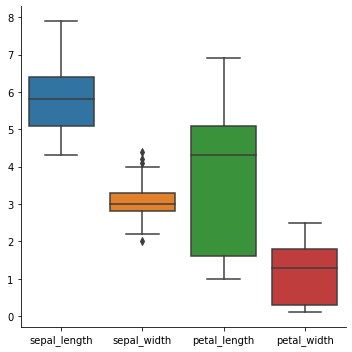

In [9]:
sns.catplot(data=data,kind='box' )

In [10]:

iqr = data['sepal_width'].quantile(0.75) - data['sepal_width'].quantile(0.25) 
print('iqr = ',iqr)
up = data['sepal_width'].quantile(0.75) + 1.5 * iqr
down = data['sepal_width'].quantile(0.25) - 1.5 * iqr
print('up = {} , down = {}'.format(up,down))
sepalw = data['sepal_width']

outlier = []
for i in sepalw:
    if i > up:
        print('outliner up ',i)
        outlier.append(i)

for i in sepalw:
    if i < down:
        print('outliner down ',i)
        outlier.append(i)
        



iqr =  0.5
up = 4.05 , down = 2.05
outliner up  4.4
outliner up  4.1
outliner up  4.2
outliner down  2.0


In [11]:
data.sepal_width = data.sepal_width.replace(outlier,data.sepal_width.mean())

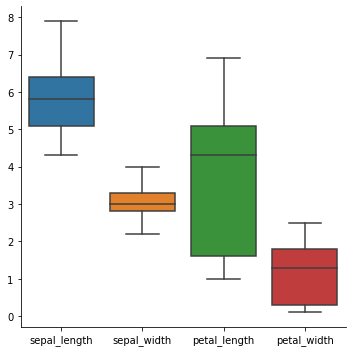

In [12]:
sns.catplot(data=data,kind='box' )

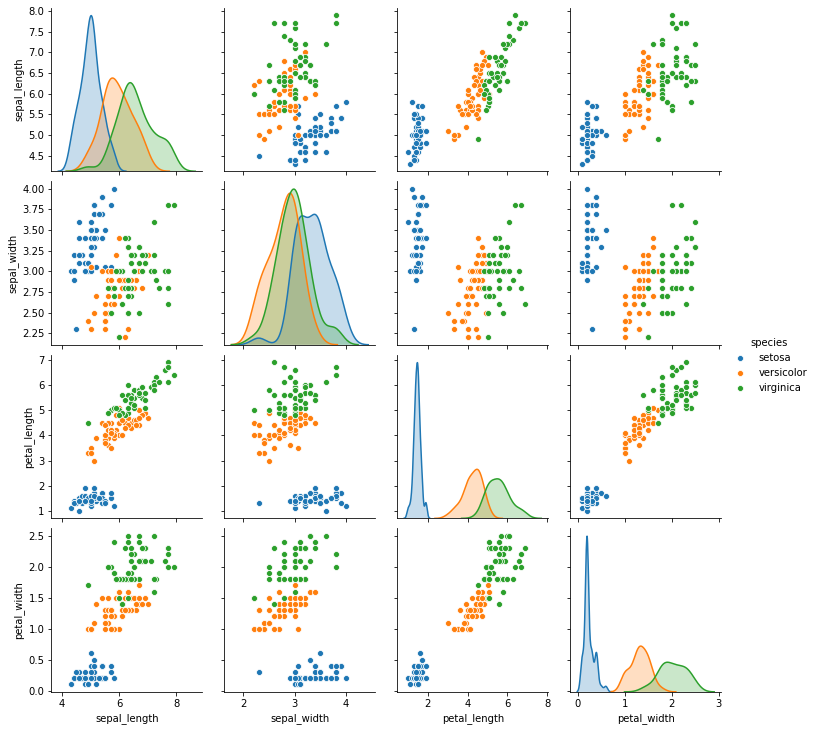

In [13]:
sns.pairplot(data,hue='species')

In [14]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [15]:
species = data['species']
species[:2]

0    setosa
1    setosa
Name: species, dtype: object

In [16]:
data = data.drop(['species'],axis = 1)
data[:2]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [17]:
data.isnull().sum()

sepal_length    1
sepal_width     1
petal_length    1
petal_width     1
dtype: int64

In [18]:
data.sepal_length = data.sepal_length.replace(0,np.NaN)
data.sepal_width = data.sepal_width.replace(0,np.NaN)
data.petal_length = data.petal_length.replace(0,np.NaN)
data.petal_width = data.petal_width.replace(0,np.NaN)

In [19]:
data.sepal_length = data.sepal_length.fillna(data.sepal_length.mean())
data.sepal_width = data.sepal_width.fillna(data.sepal_width.mean())
data.petal_length = data.petal_length.fillna(data.petal_length.mean())
data.petal_width = data.petal_width.fillna(data.petal_width.mean())


In [20]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64

In [21]:
X = data
y = species

In [22]:
X.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [23]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [24]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [25]:
print("Number of mislabeled points out of a total {} points :{}".format(X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 45 points :0


In [26]:
gnb.score(X,y)

0.9533333333333334

In [27]:
#gnb.score(y_pred,y_test)
#y_pred
accuracy_score(y_test,y_pred)

1.0

In [28]:
# print(cross_val_score(gnb, X, y, cv=15))

# print(X.shape)
# print(y.shape)


In [29]:
clf = MultinomialNB()
y_predm = clf.fit(X_train, y_train).predict(X_test)

In [30]:
print("Number of mislabeled points out of a total {} points :{}".format(X_test.shape[0], (y_test != y_predm).sum()))

Number of mislabeled points out of a total 45 points :18


In [31]:
clf.score(X,y)

0.6666666666666666

In [32]:
accuracy_score(y_test,y_predm)

0.6

In [33]:
clf2 = BernoulliNB()
y_predb = clf2.fit(X_train, y_train).predict(X_test)

In [34]:
print("Number of mislabeled points out of a total {} points :{}".format(X_test.shape[0], (y_test != y_predb).sum()))

Number of mislabeled points out of a total 45 points :34


In [35]:
clf2.score(X,y)

0.3333333333333333

In [36]:
accuracy_score(y_test,y_predb)

0.24444444444444444

In [34]:
a = cross_val_score(gnb, X, y, cv=5, scoring='accuracy')
print(a)
print('mean = ',stat.mean(a))

[0.86666667 0.96666667 0.93333333 0.93333333 0.96666667]
mean =  0.9333333333333333


In [35]:
a = cross_val_score(clf, X, y, cv=5, scoring='accuracy' )
print(a)
print('mean = ',stat.mean(a))

[1.         0.96666667 0.9        0.86666667 0.96666667]
mean =  0.9400000000000001


In [36]:
a = cross_val_score(clf2, X, y, cv=5, scoring='accuracy' )
print(a)
print('mean = ',stat.mean(a))

[0.33333333 0.33333333 0.33333333 0.33333333 0.33333333]
mean =  0.3333333333333333


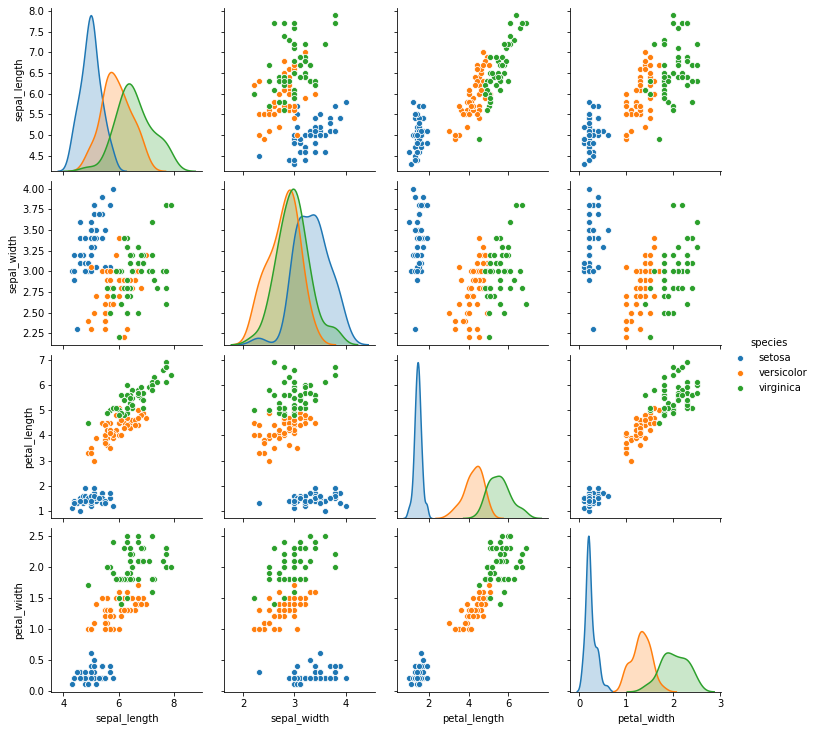

In [37]:
sns.pairplot(data2,hue = 'species')

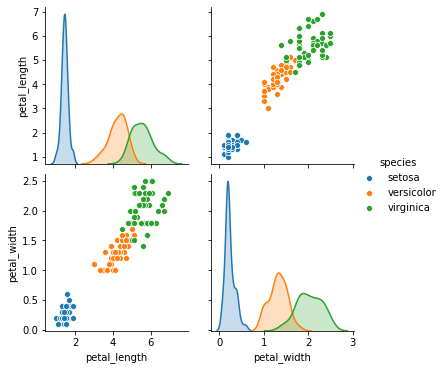

In [38]:
data3 = data2
data3 = data3.drop(['sepal_length','sepal_width'],axis=1)
sns.pairplot(data3, hue='species' )

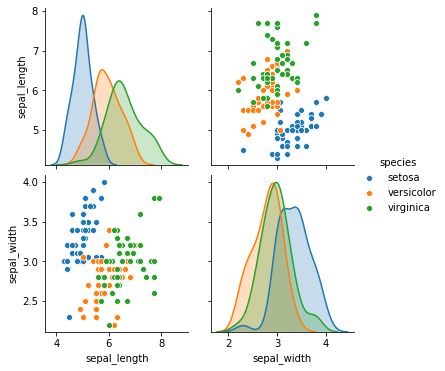

In [39]:
data2 = data2.drop(['petal_length','petal_width'],axis=1)
sns.pairplot(data2, hue='species' )

In [40]:
data2 = data
final = []

#for i in range (10):
#     data2['sepal_length'+str(i)]=data2['sepal_length']
a  = [0,1,3,5,10,50,100]



for i in a:
    for j in range(i):
        data2['sepal_length'+str(j)]=data2['sepal_length']
    print(data2.columns,'\n\n')
    temp = cross_val_score(gnb, data2, y, cv=5, scoring='accuracy' )
    final.append(stat.mean(temp))
    



Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object') 


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'sepal_length0'],
      dtype='object') 


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'sepal_length0', 'sepal_length1', 'sepal_length2'],
      dtype='object') 


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'sepal_length0', 'sepal_length1', 'sepal_length2', 'sepal_length3',
       'sepal_length4'],
      dtype='object') 


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'sepal_length0', 'sepal_length1', 'sepal_length2', 'sepal_length3',
       'sepal_length4', 'sepal_length5', 'sepal_length6', 'sepal_length7',
       'sepal_length8', 'sepal_length9'],
      dtype='object') 


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'sepal_length0', 'sepal_length1', 'sepal_length2', 'sepal_length3',
       'sepal_l

In [41]:
print(final)

[0.9333333333333333, 0.9333333333333333, 0.9133333333333333, 0.86, 0.8466666666666667, 0.76, 0.76]


Text(0.5, 1.0, 'Accuracy vs Independent variables')

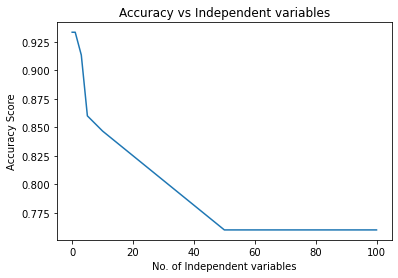

In [42]:
plt.plot(a,final)
plt.xlabel('No. of Independent variables')
plt.ylabel('Accuracy Score')
plt.title('Accuracy vs Independent variables')
